In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import pi
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.signal import chirp, butter, filtfilt, correlate, correlation_lags, lfilter, convolve, csd

ImportError: Failed to import any of the following Qt binding modules: PyQt6, PySide6, PyQt5, PySide2

In [9]:
# %% 9.1
fs = 500
T1 = 1
T2 = 100
t1 = np.arange(0, T1, 1/fs)
t2 = np.arange(0, T2, 1/fs)
T = 0.1
h = 1/T * np.exp(-t1/T)

np.random.seed(0)
x = np.random.randn(T2*fs)
fc = 30
b, a = butter(9, fc/(fs/2))
x = lfilter(b, a, x)
x = x - np.mean(x)
x = x / np.std(x)
y = np.convolve(h, x, mode='full')/fs
#y = convolve(y, x, mode='full')

N = 4*fs
fxx, Sxx = csd(x, x, window='han', nperseg=N, noverlap=N//2, fs=fs, scaling='spectrum', return_onesided=False)
fyy, Syy = csd(y, y, window='han', nperseg=N, noverlap=N//2, fs=fs, scaling='spectrum', return_onesided=False)
fxy, Sxy = csd(x, y, window='han', nperseg=N, noverlap=N//2, fs=fs, scaling='spectrum', return_onesided=False)

Sxx = np.fft.fftshift(Sxx)
Syy = np.fft.fftshift(Syy)
Sxy = np.fft.fftshift(Sxy)

fxx = np.fft.fftshift(fxx)
fyy = np.fft.fftshift(fyy)
fxy = np.fft.fftshift(fxy)

H1 = Sxy / Sxx
H = np.fft.fftshift(np.fft.fft(h, N))/fs

Gamma = np.abs(Sxy)**2 / (Sxx * Syy)
f = np.fft.fftshift(fftfreq(H.size,1/fs))



plt.figure(1)
plt.plot(fxx, 10*np.log10(np.abs(Sxx)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Sxx (dB)')
plt.axis([-30, 30, -30, -20])

plt.figure(2)
plt.plot(fxy, 10*np.log10(np.abs(Sxy)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Sxy| (dB)')
plt.axis([-30, 30, -45, -20])


plt.figure(3)
plt.plot(f, 10*np.log10(np.abs(H1)))
plt.plot(f, 10*np.log10(np.abs(H)), 'r:')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H1| (dB)')
plt.xlim(-30,30)
#plt.axis([-30, 30, -30, 5])

plt.figure(4)
plt.plot(f, np.unwrap(np.angle(H1)))
plt.plot(f, np.unwrap(np.angle(H)), 'r:')
plt.xlabel('Frequency (Hz)')
plt.ylabel('arg H1 (rad)')
plt.xlim(-30,30)
#plt.axis([-30, 30, -1.6, 1.6])

plt.figure(5)
plt.plot(f, Gamma)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence function')
plt.xlim(-150,150)
#plt.axis([-150, 150, 0, 1.1])



(-150.0, 150.0)

In [5]:
# %% 9.2
fs=500; T1=1; T2=40
t1 = np.arange(0,T1,1/fs)
t2 = np.arange(0,T2,1/fs)
T=0.1
h=1/T*np.exp(-t1/T)
A=2
f=1
w=2*pi*f
x=A*np.sin(w*t2)
y=lfilter(h,1,x)/fs

maxlag=2*fs
tau, Ryy=xcorr(y,y,fs)
tau, Rxy=xcorr(y,x,fs)
phi=np.atan(1/(w*T))
Ryy_a=(A**2/2)*(1./(1+(w*T)**2))*np.cos(w*tau)
Rxy_a=(A**2/2)*(1./np.sqrt(1+(w*T)**2))*np.sin(w*tau+phi)

plt.figure(1) 
plt.plot(tau,Ryy)
plt.plot(tau,Ryy_a, 'r:') 
plt.xlim(-2,2)


plt.figure(2) 
plt.plot(tau,Rxy) 
plt.plot(tau,Rxy_a, 'r:') 
plt.xlim(-2,2)


NameError: name 'xcorr' is not defined

We consider the simple acoustic problem as shown in Figure 9.15. Then, we may model
the measured signal as

Mic. $A= x( t) = as( t)$

(9.81)

Mic. $B= y( t) = bs( t- \Delta _1) + cs( t- \Delta _2)$

where $\Delta_{1}$ and $\Delta_2$ are time delays.

![](https://storage.simpletex.cn/view/fVh788vHrurSrfQp16kFlxY5CGQ9zh2Ft)



Figure 9.15 A simple acoustic example: transmission path identification
If the source signal $s(t)$ is broadband, then the autocorrelation function $R_{ss}(\tau)$ is narrow as depicted in the figure. By treating $x(t)$ as an input and $y(t)$ as an output i.e. y$(t)=h(t)*x(t)$, as we have seen in Chapter 4, the impulse response function and frequency response function are given by

\begin{gathered}
h(t) =\frac ba\delta(t-\Delta_1)+\frac ca\delta(t-\Delta_2) (9.82) \\
H(f) =\frac{b}{a}e^{-j2\pi f\Delta_{1}}\left[1+\frac{c}{b}e^{-j2\pi f(\Delta_{2}-\Delta_{1})}\right] \text{(9.83)} 
\end{gathered}

We now establish the delays and the relative importance of paths by forming the
cross-correlation between $x(t)$ and y$(t)$ as
$$R_{xy}(\tau)=E[x(t)y(t+\tau)]=abR_{ss}(\tau-\Delta_1)+acR_{ss}(\tau-\Delta_2)$$
(9.84)
This may be drawn as in Figure 9.16.


![](https://storage.simpletex.cn/view/f60qHYmghGDQM7MEAOvVOxTkylzE0kH4p)

Figure 9.16 Cross-correlation function between $x(t)$ and y$(t)$

Note that $\Delta_{1}$ and $\Delta_2$ are identified if $R_{ss}(\tau)$ is `narrow'compared with $\Delta_2-\Delta_1$, and the relative magnitudes yield $b/c.$ If the source signal has a bandwidth of $B$ as shown in Figure 9.17, then the autocorrelation function of $s(t)$ can be written as
$$R_{ss}(\tau)=AB\frac{\sin(\pi B\tau)}{\pi B\tau}\cos(2\pi f_0\tau)$$
(9.85)

Thus, in order to resolve the delays, it is required that (roughly) $\Delta_2-\Delta_1>2/B.$

![](https://storage.simpletex.cn/view/fFN4IkZbIr8L8duxnHGBUnKOSWGHPrPgO)

Figure 9.17 Power spectral density function of the band-limited signal s(t)

Time domain methods as outlined above are probably best-but we might also look at frequency domain methods. First, consider the cross-spectral density function for the simpler case of no reflector, i.e. as shown in Figure 9.18.

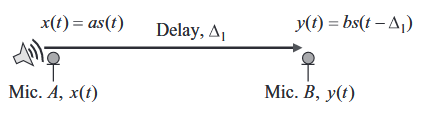

Figure 9.18 A simple acoustic example with no reflector

Then, $R_{\mathrm{xy}}(\tau)=abR_{ss}(\tau-\Delta_1)$ and $S_{\mathrm{xy}}(f)=abe^{-j2\pi f\Delta_1}S_{\mathrm{ss}}(f).$ So arg $S_\mathrm{xy}(f)$ gives the delay (see also MATLAB Example $\dot{8}.9)$, but it turns out that the phase is more sensitive to other reflections (not the uncorrelated noise) than the correlation function.
Now reconsider the first problem (with a hard reflector). Suppose that y(t) is noise contaminated, i.e. $y_m(t)=y(t)+n(t).$ If $n(t)$ is independent of y$(t)$ then $R_{xy_m}(\tau)=$ $R_{xy}(\tau)$ and $S_{xy_{m}}(\dot{f})=S_{xy}(\dot{f}).$ Thus, from Equation $\bar{(9.84)}$, the cross-spectral density

function is
$$S_{xy_m}(f)=S_{xy}(f)=abe^{-j2\pi f\Delta_1}\left[1+\frac{c}{b}e^{-j2\pi f(\Delta_2-\Delta_1)}\right]S_{ss}(f)$$
(9.86)

So the delay information is contained in the phase. However, unlike the single delay problem arg $S_{xy}(f)$ shows a mixture of two delay components. As will be seen later, although it is possible to identify both delays $\Delta_1$ and $\Delta_{2}$ from the cross-spectral density function, the frequency domain method is more difficult in this case. Also, consider the coherence function (see Equation (9.33)), which is

(9.87)
$$\gamma_{xy_m}^2(f)=\frac{\left|S_{xy_m}(f)\right|^2}{S_{xx}(f)S_{y_my_m}(f)}=\frac{S_{yy}(f)}{S_{yy}(f)+S_{nn}(f)}=\frac{S_{yy}(f)}{S_{y_my_m}(f)}$$
For convenience, let $b=c$ and $\Delta_2-\Delta_1=\Delta;$ then
$$S_{yy}(f)=2b^2\left[1+\cos(2\pi f\Delta)\right]S_{ss}(f)$$
(9.88)

So we see that $\gamma_{xy_m}^2(f)=0$ at certain frequencies $(f=n/2\Delta,n=1,3,5,\ldots)$, i.e. the coherence collapses owing to destructive interference (i.e.the measurement SNR

becomes very low).
In the above, we considered both individual transmission paths as non-dispersive. (Note that the two paths taken together are dispersive, i.e. the group delay is $-d\phi/d\omega\neq$ const.) In practical cases, we must first decide whether the paths are dispersive or nondispersive. If dispersive, the propagation velocity varies with frequency. In such cases, broadband methods may not be successful since waves travel at different speeds. In order to suppress the dispersive effect the cross-correlation method is applied for narrow frequency bands, though this too has a smearing effect.

We now examine the transmission path identification problem described above, where

the measured signal is
$$\begin{aligned}&x(t)=as(t)\\&y_m(t)=y(t)+n(t)=bs(t-\Delta_1)+cs(t-\Delta_2)+n(t)\end{aligned}$$

The cross-correlation function and the cross-spectral density function are
$$R_{xy_m}(\tau)=E[x(t)y_m(t+\tau)]=abR_{ss}(\tau-\Delta_1)+acR_{ss}(\tau-\Delta_2)$$
and
$$S_{xy_m}(f)=\begin{bmatrix}abe^{-j2\pi f\Delta_1}+ace^{-j2\pi f\Delta_2}\end{bmatrix}S_{ss}(f)$$
In this example, we shall compare the time domain method (using the cross-correlation

function) and the frequency domain method (using the cross-spectral density function).

In [ ]:
fs = 100
T = 500
t = np.arange(0, T-1/fs, 1/fs)
np.random.seed(0)
s = np.random.randn(len(t))
fc = 10
b, a = butter(9, fc/(fs/2))
s = filtfilt(b, a, s)
s = s - np.mean(s)
s = s / np.std(s)
a = 1
b = 0.8
c = 0.75
delta1 = 1
delta2 = 1.5
N1 = 2*fs
N2 = T*fs - N1
x = a * s
y = np.zeros_like(x)
y[int(delta1*fs):] += b * s[:int(-delta1*fs)]
y[int(delta2*fs):] += c * s[:int(-delta2*fs)]


np.random.seed(10)
n = np.random.randn(len(y)) * 0.1
y = y + n
maxlag = 2*fs
tau, Rxy = xcorr(y, x, fs)

T1 = 50
f, Gxx  = csd(x, x, window='han', nperseg=T1*fs, noverlap=T1*fs//2, fs=fs, scaling='spectrum')
f, Gyy  = csd(y, y, window='han', nperseg=T1*fs, noverlap=T1*fs//2, fs=fs, scaling='spectrum')
f, Gxy  = csd(x, y, window='han', nperseg=T1*fs, noverlap=T1*fs//2, fs=fs, scaling='spectrum')
Gamma = np.abs(Gxy)**2 / (Gxx * Gyy)


plt.figure(1)
plt.plot(tau[maxlag+1:], Rxy[maxlag+1:])
plt.xlabel('Lag (τ)')
plt.ylabel('Cross-correlation')
plt.axis([0, 2, -0.2, 0.8])

plt.figure(2)
plt.plot(f, np.unwrap(np.angle(Gxy)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('arg Gxy (rad)')
plt.axis([0, 15, -120, 10])

plt.figure(3)
plt.plot(f, Gamma)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence function')
plt.axis([0, 15, 0, 1.2])


EXAMPLE 9.4 - Consider the following impulse response function of a two-degree-of-freedom system:

$h(t)=\frac{A_1}{\omega_{d1}}e^{-\zeta_1\omega_{n1}t}\sin\omega_{d1}t+\frac{A_2}{\omega_{d2}}e^{-\zeta_2\omega_{n2}t}\sin\omega_{d2}t$

In this example, we use the white noise as an input $x(t)$, and the output $y(t)$ is obtained by $y(t)=h(t) ∗ x(t)$. We also consider the uncorrelated measurement noise. Three FRF estimators, $H_1( f )$, $H_2( f )$, and $H_T ( f )$, are compared for three different cases: Case (a), output noise only; Case (b), input noise only; and Case (c), both input and output noise.
Equations (9.63), (9.65) and (9.68) are used in this example, i.e.

$H_1(f)=\frac{\tilde{S}_{x_my_m}(f)}{\tilde{S}_{x_mx_m}(f)},\quad H_2(f)=\frac{\tilde{S}_{y_my_m}(f)}{\tilde{S}_{y_mx_m}(f)}$

$H_T(f)=\frac{\tilde{S}_{y_my_m}(f)-\tilde{S}_{x_mx_m}(f)+\sqrt{\left[\tilde{S}_{x_mx_m}(f)-\tilde{S}_{y_my_m}(f)\right]^2+4\left|\tilde{S}_{x_my_m}(f)\right|^2}}{2\tilde{S}_{y_mx_m}(f)}$

In [ ]:
# Constants
A1 = 20
A2 = 30
f1 = 5
f2 = 15
wn1 = 2 * np.pi * f1
wn2 = 2 * np.pi * f2
zeta1 = 0.05
zeta2 = 0.03
wd1 = np.sqrt(1 - zeta1**2) * wn1
wd2 = np.sqrt(1 - zeta2**2) * wn2
fs = 50
T1 = 10
t1 = np.arange(0, T1, 1/fs)

# Impulse response
h = (A1 / wd1) * np.exp(-zeta1 * wn1 * t1) * np.sin(wd1 * t1) + (A2 / wd2) * np.exp(-zeta2 * wn2 * t1) * np.sin(wd2 * t1)

# Signal
T = 5000
np.random.seed(0)
x = np.random.randn(T * fs)
y = lfilter(h, 1, x)

# Noise
np.random.seed(10)
nx = 0.5 * np.random.randn(len(x))  
nx = 0 #for Case (a)
np.random.seed(20)
ny = 0.5 * np.random.randn(len(y))  
#ny = 0 #for Case (b)
x = x + nx
y = y + ny


# Power spectral density
N1 = T1 * fs
f, Gxx = csd(x, x, window='han', nperseg=N1, noverlap=N1 // 2, fs=fs, scaling='spectrum')
f, Gyy = csd(y, y, window='han', nperseg=N1, noverlap=N1 // 2, fs=fs, scaling='spectrum')
f, Gxy = csd(x, y, window='han', nperseg=N1, noverlap=N1 // 2, fs=fs, scaling='spectrum')
f, Gyx = csd(y, x, window='han', nperseg=N1, noverlap=N1 // 2, fs=fs, scaling='spectrum')

# Frequency response
H1 = Gxy / Gxx
H2 = Gyy / Gxy
HT = (Gyy - Gxx + np.sqrt((Gxx - Gyy)**2 + 4 * np.abs(Gxy)**2)) / (2 * Gxy)
H = fft(h)
fh = fftfreq(H.size,1/fs)[:H.size//2]
H = H[:H.size//2]

# Plots

plt.figure(1)
plt.plot(f, 20 * np.log10(np.abs(H1)), fh, 20 * np.log10(np.abs(H)), 'r:')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H1(f)| (dB)')
plt.axis([0, 25, -30, 25])

plt.figure(2)
plt.plot(f, 20 * np.log10(np.abs(H2)), fh, 20 * np.log10(np.abs(H)), 'r:')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H2(f)| (dB)')
plt.axis([0, 25, -30, 25])

plt.figure(3)
plt.plot(f, 20 * np.log10(np.abs(HT)), fh, 20 * np.log10(np.abs(H)), 'r:')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|HT(f)| (dB)')
plt.axis([0, 25, -30, 25])

plt.show()